# **Context**

Austo Motor Company is a leading car manufacturer that specializes in SUV, sedan, and hatchback models. During a recent board meeting, the members expressed concerns about the effectiveness of the current marketing campaign.

# **Objective**

Analyzing the data to get a fair Idea about the demand of customers to enhance their customer experience. Performing the data analysis to answer the key questions, which will help the company improve its business.

# **Key Questions**

 1. Do men tend to prefer SUVs more compared to women?
 2. What is the likelihood of a salaried person buying a Sedan?
 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
 4. How does the the amount spent on purchasing automobiles vary by gender?
 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?
 6. How does having a working partner influence the purchase of higher-priced cars?

# Data Description:



*   Age: The age of the individual in years.
*  Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Price: The price of a product or service.
* Make: The type of automobile









# **Data Overview**

## Importing the required Libraries

In [109]:
# Libraries to help with reading and manipulating data.
import numpy as np
import pandas as pd

# Libraries to help with Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data set

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
data = pd.read_csv('/content/drive/MyDrive/PGP-DS/Python for Data Science/Project/austo_automobile .csv')

In [112]:
## copying data to another variable named as df to avoid any changes to the original data.
df = data.copy()

## Structure of the Data

In [113]:
# Displaying the first 5 rows of the data set
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [114]:
# Checking the Shape of data
df.shape
print('The data set contains', df.shape[0], 'rows and', df.shape[1], 'columns.')

The data set contains 1581 rows and 14 columns.


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


* *Every column has 1581 Values except the (`Gender`)and (`Partner_working`) columns, which indicates that there are a few missing values in both columns.*

* *The (`Partner_salary`) column is read as a float64 data type it can be changed to int64 dtype*

* *The (`Personal_Loan, House_Loan and Partner_working`)  column reads as objects. It's better to turn them into 0 and 1 for better statistical analysis.*

* *The object type columns contains categories in them*

* *The int64 type columns contains numerical values in them*

In [116]:
# Turning yes or no variable columns into variables 0 and 1
yes_no_cols = ['Personal_loan', 'House_loan', 'Partner_working']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [117]:
# Printing unique values in below three binary variable columns
yes_no_cols = ['Personal_loan', 'House_loan', 'Partner_working']
for col in yes_no_cols:
    print(df[col].unique())

[0 1]
[0 1]
[1 0]


In [118]:
#verifying the data types of each column again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   int64  
 7   House_loan        1581 non-null   int64  
 8   Partner_working   1581 non-null   int64  
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 173.1+ KB


* *The Personal_loan, Home_Loan, and Partner working column types of data are changed to int64.*

## Treating Missing Values

In [119]:
#Checking the missing Values across the columns
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


* *The varaible (`Gender`) has 53 missing values.*
* *The variable (`Partner salary`) has 106 Missing Values.*
* There are no misssing values in other variables.

Let's see the Gender column values in detail

In [120]:
df.Gender.value_counts(normalize=True)

,proportion
Gender,
Male,0.784686
Female,0.214005
Femal,0.000654
Femle,0.000654


* *The output shows the distribution of Gender categories:*
* *Male: 78.47%*
* *Female: 21.40%*
* *There are entries with (`Femal, Femle`) which are likely typo errors for (`Female`), which needs to be corrected.*

In [121]:
# Correcting the typo errors in the 'Gender' column
df['Gender'] = df['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'})

In [122]:
# Verifying the corrected values
print(df['Gender'].value_counts(normalize = True))

Gender
Male      0.784686
Female    0.215314
Name: proportion, dtype: float64


Let's see the missing values in 'Gender' column in detail

In [123]:
df.loc[df['Gender'].isnull() == True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,1,0,1,78000,600.0,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,0,0,1,87900,700.0,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,1,0,1,80900,30000.0,110900,49000,SUV
125,47,NaN,Salaried,Single,Post Graduate,2,1,0,0,87200,0.0,87200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,1,0,0,68600,0.0,68600,50000,SUV
302,41,NaN,Salaried,Married,Graduate,1,1,0,0,55900,0.0,55900,32000,Sedan
325,40,NaN,Business,Married,Graduate,1,0,1,0,59600,0.0,59600,31000,Sedan
463,36,NaN,Salaried,Married,Post Graduate,3,1,0,0,66600,0.0,66600,49000,SUV
485,35,NaN,Business,Married,Post Graduate,2,1,1,1,61600,25000.0,86600,31000,Sedan
528,34,NaN,Salaried,Single,Post Graduate,2,0,1,0,64800,0.0,64800,32000,Sedan


* *The missing values in (`Gender`) column also has a few missing values in (`Partner salary`) column.*

In [124]:
# Imputing the missing values in Gender column with mode of that column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [125]:
# Let's check the missing values in each column
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


* *The missing values in the Gender column were addressed by imputing the mode of that column.*

In [126]:
# Let's examine the Partner_salary rows that have missing values.
df.loc[df['Partner_salary'].isnull() == True]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,1,0,0,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,0,0,1,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,0,0,1,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,1,0,1,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,0,0,1,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,1,0,0,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,1,1,0,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,0,1,0,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,0,0,0,32000,NaN,32000,31000,Hatchback


* *There is a strong correlation between the Partner working column and the Partner salary column regarding missing values.*

In [127]:
# Filtering rows with missing values of Partner_salary for non-working Partners
filtered_df1 = df[(df['Partner_working'] == 0) & (df['Partner_salary'].isnull())]
print(filtered_df1)

      Age  Gender Profession Marital_status      Education  No_of_Dependents  \
40     53  Female   Salaried        Married       Graduate                 1   
115    48  Female   Salaried        Married  Post Graduate                 3   
163    45    Male   Salaried        Married  Post Graduate                 1   
164    45    Male   Business        Married       Graduate                 1   
165    45    Male   Salaried        Married       Graduate                 2   
...   ...     ...        ...            ...            ...               ...   
1559   22    Male   Business        Married  Post Graduate                 3   
1567   22    Male   Salaried         Single       Graduate                 0   
1568   22    Male   Salaried        Married       Graduate                 3   
1577   22    Male   Business        Married       Graduate                 4   
1579   22    Male   Business        Married       Graduate                 3   

      Personal_loan  House_loan  Partne

* *There are 90 rows of data where partner salary values are missing for non-working partners.*

In [128]:
# Filtering rows with missing values of Partner_salary for working Partners
filtered_df2 = df[(df['Partner_working'] == 1) & (df['Partner_salary'].isnull())]
print(filtered_df2)

      Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Marr

* *There are 16 rows of data where the partner salary values are missing for working partners.*

* *The total salary column represents the sum of the individual's salary and their partner's salary.*

* *We can fill in the missing values of the partner salary column for individuals whose partners are working by subtracting the individual's salary from the total salary.*

In [129]:
# Replacing the missing values in the Partner salary column for non-working partners with 0
df.loc[(df['Partner_working'] == 0) & (df['Partner_salary'].isnull()), 'Partner_salary'] = 0

In [130]:
# Replacing the missing values in the partner salary column for working partners by subtracting the individual's salary from the total salary
df.loc[(df['Partner_working'] == 1) & (df['Partner_salary'].isnull()), 'Partner_salary'] = df['Total_salary'] - df['Salary']

In [131]:
# Let's check the missing values in each column
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [132]:
#saving the dataset with no missing values
df.to_csv('/content/drive/MyDrive/PGP-DS/Python for Data Science/Project/austo_automobile_cleaned.csv', index=False)

## Fixing the data types

In [133]:
#changing the data type of Partner_salary column into int64
df['Partner_salary']=df['Partner_salary'].astype('int64')

In [134]:
# verifying the dtype of Partner_salary column
df['Partner_salary'].dtype

dtype('int64')

## Statistical Summary of the dataset


In [135]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.92,8.43,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.46,0.94,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581.0,0.50,0.50,0.0,0.0,1.0,1.0,1.0
House_loan,1581.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
Partner_working,1581.0,0.55,0.50,0.0,0.0,1.0,1.0,1.0
Salary,1581.0,60392.22,14674.83,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.78,19670.39,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79626.00,25545.86,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.72,13633.64,18000.0,25000.0,31000.0,47000.0,70000.0


* *The average age of an individual is approximately 31.9 years, with a minimum age of 22 and a maximum age of 54.*

* *On an average, individuals have about 2.5 dependents.*

* *50 % of Individuals have personal Loans, while 33% percent of individuals have a house loan.*

* *55% of individuals have a working partner.*

# **Exploratory Data Analysis**

# Univariate Analysis

## Observation on Age

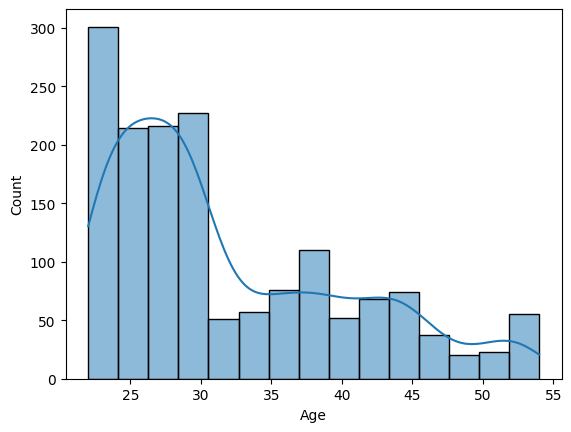

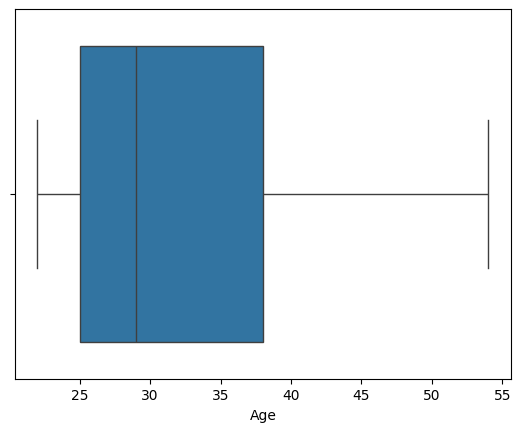

In [136]:
sns.histplot(data=df, x='Age', kde=True)
plt.show()
sns.boxplot(data=df, x='Age')
plt.show()

* *The Distibution is skewed towards right side.*
* *There are no outliers present in this column.*
* *The minimum age of individual is 22 and maximum age is 54*

## Observation on No_of_Dependents

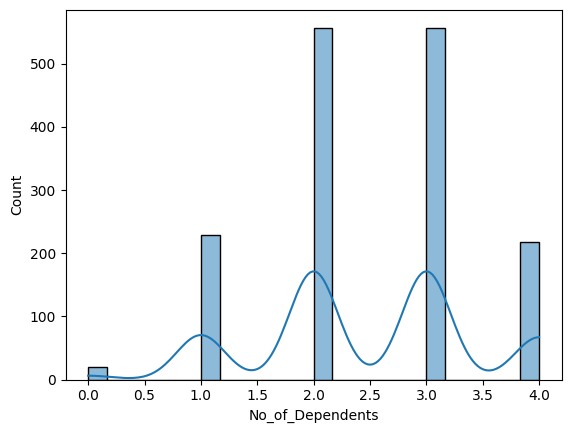

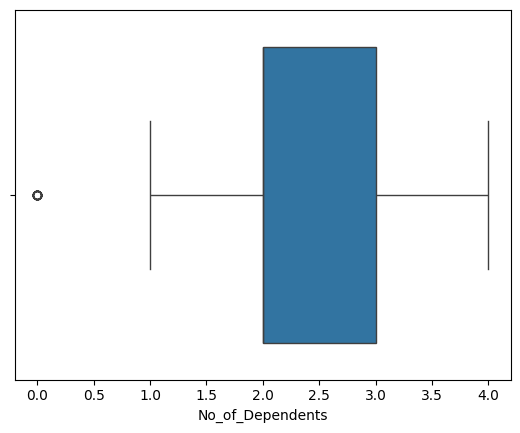

In [137]:
sns.histplot(data=df, x='No_of_Dependents', kde=True)
plt.show()
sns.boxplot(data=df, x='No_of_Dependents')
plt.show()

* *italicised text* *The distribution is somewhat symmetrical.*
* *The number of dependents is mostly from 2 to 3.*
* *We also have an outlier on the left side at value 0, which indicates there are zero dependents for few Individuals.*

## Observation on Salary

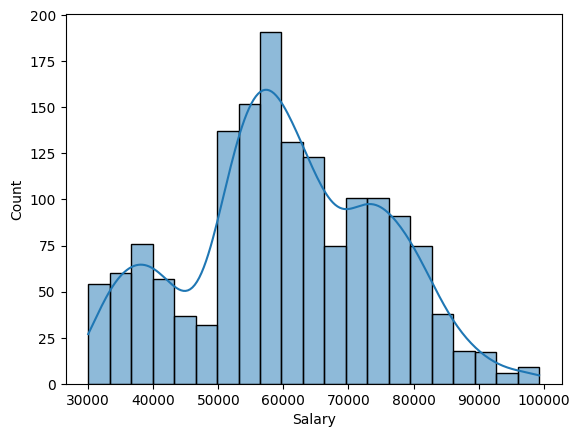

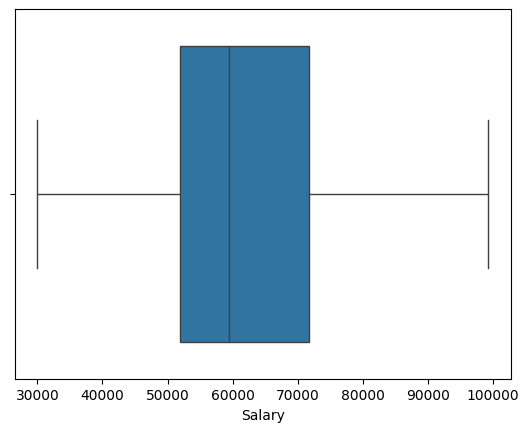

In [138]:
sns.histplot(data=df, x='Salary', kde=True)
plt.show()
sns.boxplot(data=df, x='Salary')
plt.show()

* *The distribution is symmetrical.*
* *The median salary appears to be around 60,000.*
* *The minimum salary is around 30,000 and maximum is around 100000.*
* *There are no outliers in this column.*


## Observation on Partner_salary

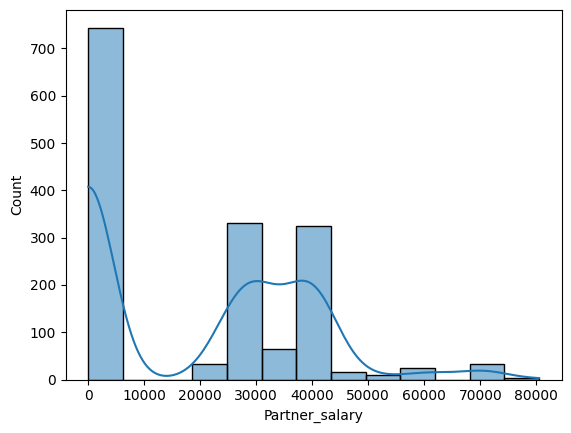

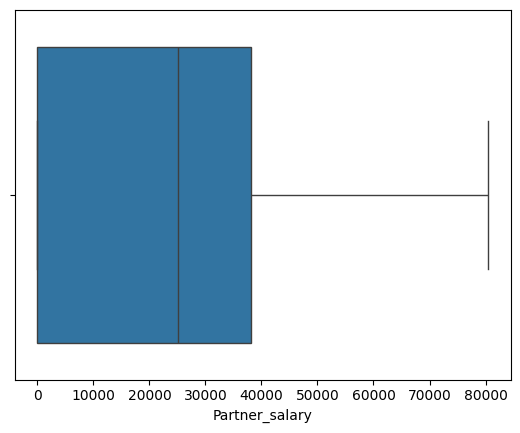

In [139]:
sns.histplot(data=df, x='Partner_salary', kde=True)
plt.show()
sns.boxplot(data=df, x='Partner_salary')
plt.show()

* *The distribution appears to be right-skewed.*
* *The whisker extends to approximately 80,000, indicating the maximum salary in the data set, and the minimum salary is 0.*
* *There are no outliers in this column.*

## Observation on Total_Salary

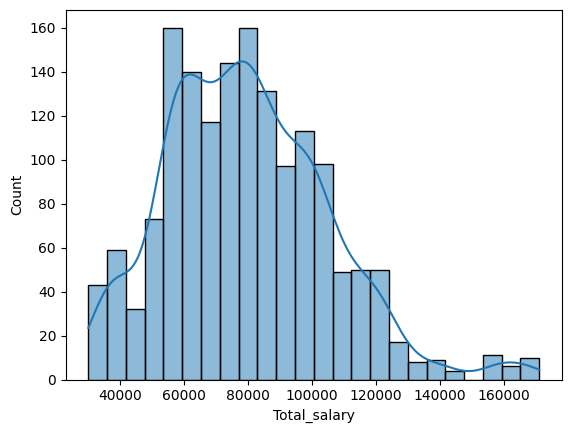

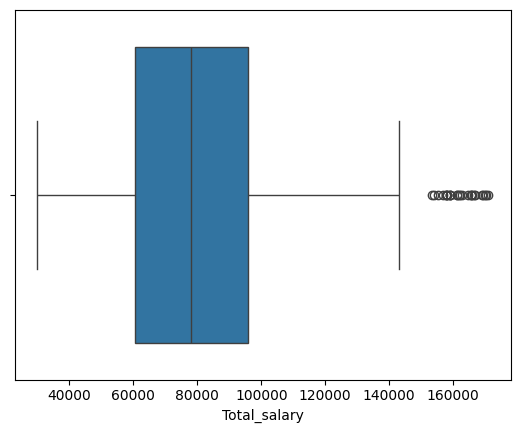

In [140]:
sns.histplot(data=df, x='Total_salary', kde=True)
plt.show()
sns.boxplot(data=df, x='Total_salary')
plt.show()

* *The distribution is skewed towards the right side.*
* *There are many outliers present above the upper whisker, indicating some of the Individuals total salary is significantly higher.*


## Observation on Price

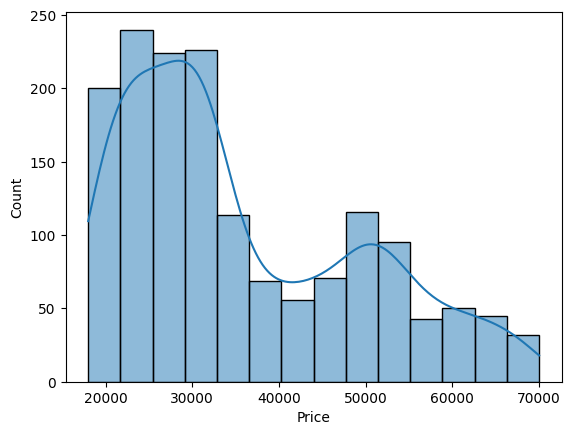

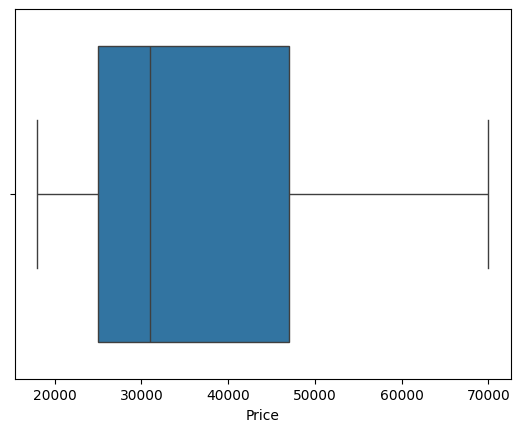

In [141]:
sns.histplot(data=df, x='Price', kde=True)
plt.show()
sns.boxplot(data=df, x='Price')
plt.show()

* *There are no outliers present in this column.*
* *The distribution is skewed towards the right side.*
* *The minimum price of a product is 18000, and the maximum price is 70000.*

## Observation on Gender

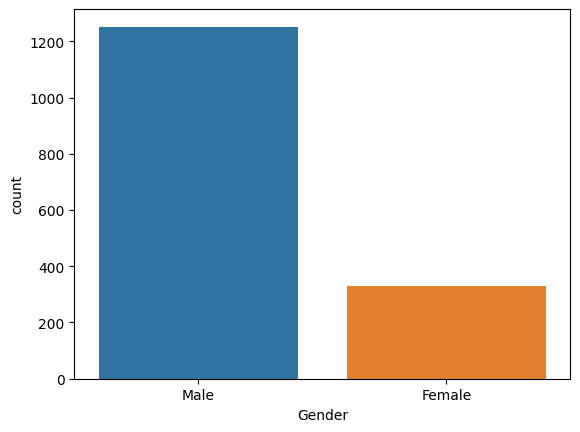

In [197]:
sns.countplot(data=df, x='Gender', hue='Gender');

* *The dataset contains significantly more males than females, with 1,252 males and 329 females.*

## Observation on Profession

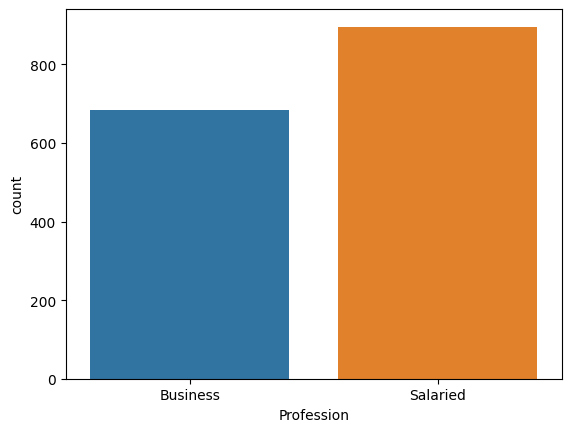

In [196]:
sns.countplot(data=df, x='Profession', hue='Profession');

* *The chart indicates that individuals in salaried professions outnumber those in business professions.*
* *Number of Business profession Individuals: 685*
* *Number of Salaried profession Individuals: 896*

# **Bivariate / Multivariate Analysis**

## Correlation by Heat map for all numerical variable columns

In [144]:
#selecting the numerical columns
num_var = df.select_dtypes(exclude = ['object'])


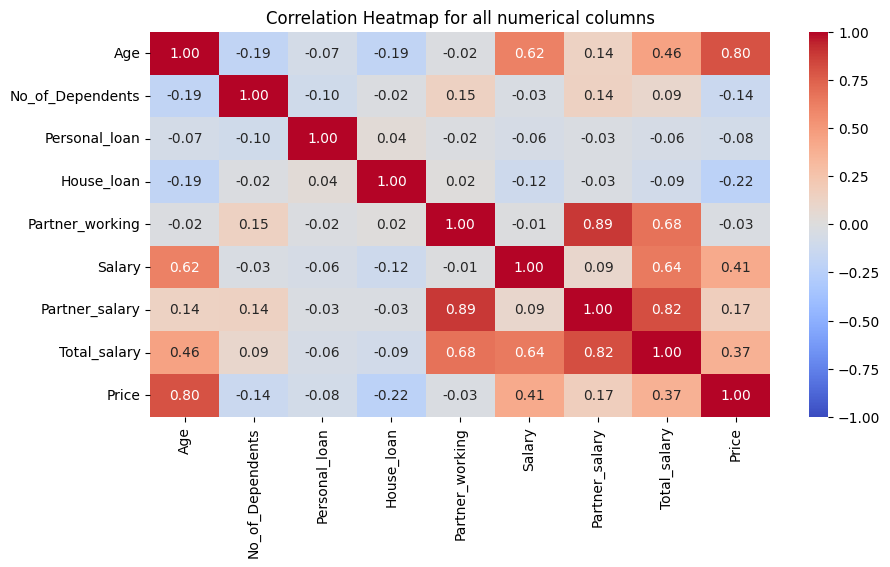

In [145]:
#plotting the heat map among numerical variable columns
corr =num_var.corr()
plt.figure(figsize=(10,5))
plt.title('Correlation Heatmap for all numerical columns')
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
plt.show()

* *There is a strong positive correlation between Age and Price (0.80), which means older Individuals tend to have high-priced products.*

* *The Age has a moderate to strong correlation with Salary and Total Salary, which means older Individuals tend to have higher salaries and higher total salaries.*

* *The Partner salary has a strong correlation with partner working and Total salary, which means the partner salaries tend to contribute to higher total salaries.*


## Q1. Do men tend to prefer SUVs more compared to women?

Text(0, 0.5, 'Count of individuals')

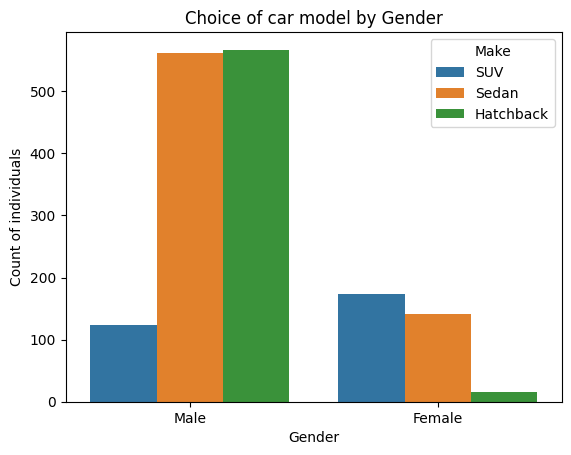

In [193]:
sns.countplot(data=df, x='Gender', hue='Make');
plt.title('Choice of car model by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of individuals')


* *Females tend to prefer SUVs more than males, although their overall count is lower. Specifically, 173 females prefer SUVs, while only 124 males choose SUV.*

* *Males show a strong preference for Hatchbacks and Sedans, with counts of 567 and 561.*

* *Hatchbacks are less popular compared to SUVs and Sedans among females.*

## Q2. What is the likelihood of a salaried person buying a Sedan?




Text(0.5, 0, 'Profession of the Individual')

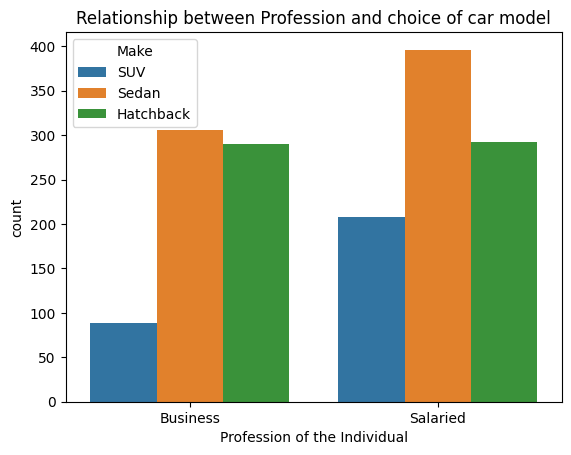

In [192]:
sns.countplot(data=df, x='Profession', hue='Make');
plt.title('Relationship between Profession and choice of car model')
plt.xlabel('Profession of the Individual')

* *Sedans are the most popular type of car among both professions, but salaried individuals show a particularly high preference for sedans.*

* *so salaried customer is most likely to purchase a sedan.*

* *Hatchbacks have similar popularity among both professions.*

* *Additionally, salaried individuals tend to own SUVs more often than business individuals do*

## Q3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

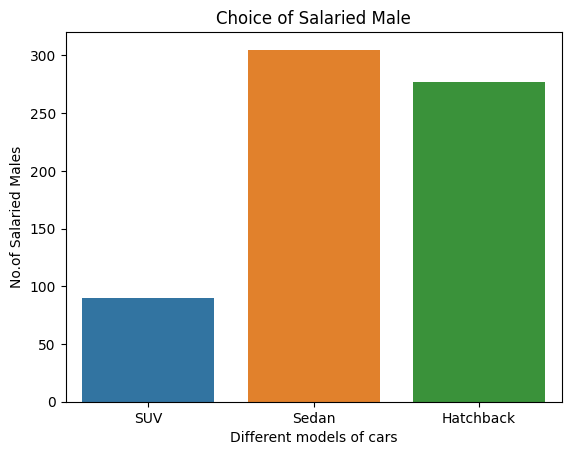

In [190]:
#Filtering the data of salaried Male
salaried_male = df[(df['Profession']== 'Salaried') & (df['Gender'] == 'Male')]
#creating a countplot
sns.countplot(data=salaried_male, x='Make', hue='Make')
plt.title('Choice of Salaried Male')
plt.xlabel('Different models of cars')
plt.ylabel('No.of Salaried Males')
plt.show()

* *The chart shows that salaried males are less likely to buy SUVs compared to sedans, as the data indicates a significantly higher number of males targeted for sedan sales.*

* *So, Salaried males are not an easy target for SUV sales over a Sedan sale.*

## Q4. How does the the amount spent on purchasing automobiles vary by gender?

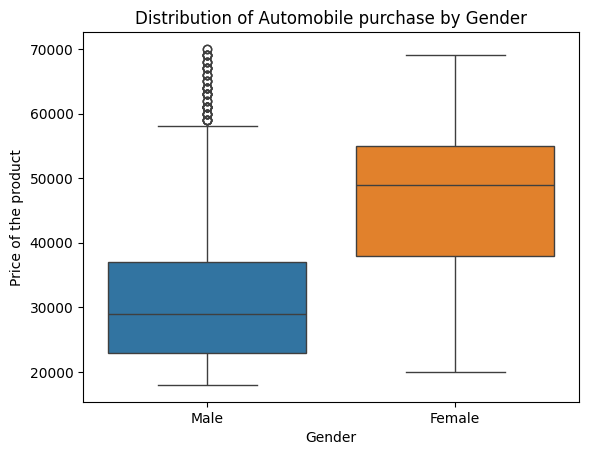

In [184]:
sns.boxplot(data=df, x='Gender', y='Price', hue='Gender');
plt.title('Distribution of Automobile purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Price of the product')
plt.show()

* *The Median purchase price for females is higher than that of males.*

* *There are outliers in male category, indicating some males purchased automobiles at significantly higher prices. There are aren't any apparent outliers in the female category.*

* *The data for males to be more skewed right side while the female data is evenly distributed.*

* *In summary females tend to purchase more on automobiles with wide range of purchase prices, while males have a narrower range, outliers are at higher prices.*

## Q5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [152]:
# Filtering the dataset to include only individuals who took out personal loan.
fil_data1 = df[df['Personal_loan'] == 1]
print(fil_data1['Personal_loan'].value_counts())

Personal_loan
1    792
Name: count, dtype: int64


* *A total of 792 individuals took out a Personal loan.*

In [153]:
# Filtering the dataset to include only individuals who did not take out personal loan.
fil_data2 = df[df['Personal_loan'] == 0]
print(fil_data2['Personal_loan'].value_counts())

Personal_loan
0    789
Name: count, dtype: int64


* *A total of 789 individuals did not take out a personal loan.*

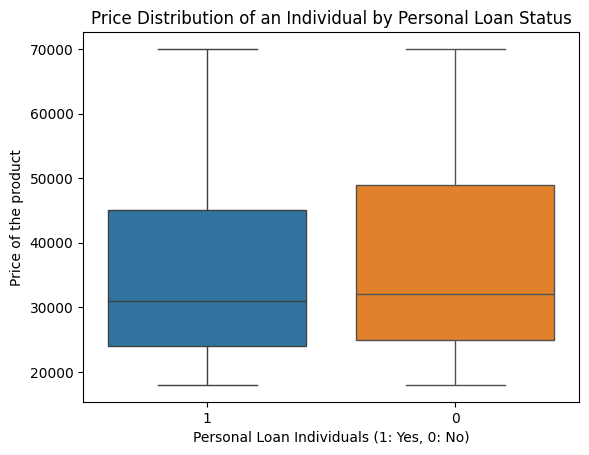

In [195]:
# Creating a boxplot for price distribution by loan status
sns.boxplot(x= fil_data1['Personal_loan'], y= fil_data1['Price'])
sns.boxplot(x= fil_data2['Personal_loan'], y= fil_data2['Price'])
plt.title('Price Distribution of an Individual by Personal Loan Status')
plt.xlabel('Personal Loan Individuals (1: Yes, 0: No)')
plt.ylabel('Price of the product')
plt.show()

* *The median purchase price is similar for both the groups around 32000.*

* *The Price range for those who idn't take a loan is slightly wider on higher end, with the upper quartile reaching 48000.*

* *Both the groups have similar maximum and minimum prices.*

* *The above data suggests that taking a personal loan by an Individual doesnot significantly effect the median price of automobile purchased.*

In [155]:
#Total amount spent by individuals on automobiles, categorized by loan status.
total_money_spent_by_loan_customers = fil_data1['Price'].sum()
total_money_spent_by_non_loan_customers = fil_data2['Price'].sum()
print('Total money spent on automobiles by Personal loan customers:', total_money_spent_by_loan_customers)
print('Total money spent on automobiles by non-Personal loan customers:', total_money_spent_by_non_loan_customers)

Total money spent on automobiles by Personal loan customers: 27290000
Total money spent on automobiles by non-Personal loan customers: 28990000


## Q6. How does having a working partner influence the purchase of higher-priced cars?

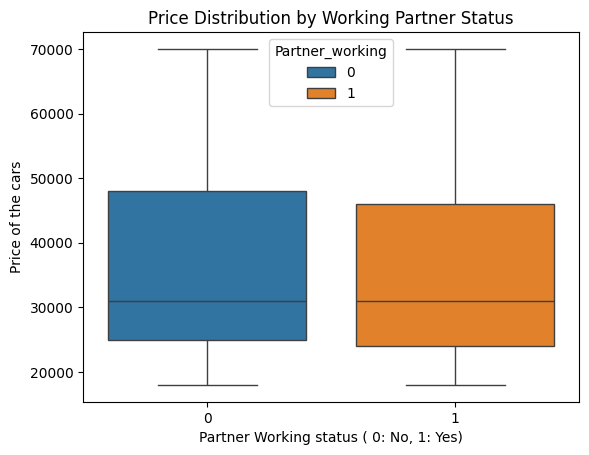

In [198]:
sns.boxplot(data=df, y='Price', x='Partner_working', hue='Partner_working');
plt.title('Price Distribution by Working Partner Status')
plt.xlabel('Partner Working status ( 0: No, 1: Yes)')
plt.ylabel('Price of the cars')
plt.show()

* *The median price of purchasing the products appears to be similar for both the groups (`working and not working partners`).*

* *Based on this visualization, the working status of a partner doesnot seem to have a substantial influence on the purchase of high priced cars.*

## Price Distribution by Home loan status

In [156]:
#Filtering the data to include only individuals who took out a house loan.
Hou_fil_data1 =df[df['House_loan'] == 1]
print(Hou_fil_data1['House_loan'].value_counts())

House_loan
1    527
Name: count, dtype: int64


* *A total of 527 individuals took out a House loan.*

In [157]:
#Filtering the data to include only individuals who took out a house loan
Hou_fil_data2 =df[df['House_loan'] == 0]
print(Hou_fil_data2['House_loan'].value_counts())

House_loan
0    1054
Name: count, dtype: int64


* *A total of 1054 individuals did not take out a House loan.*

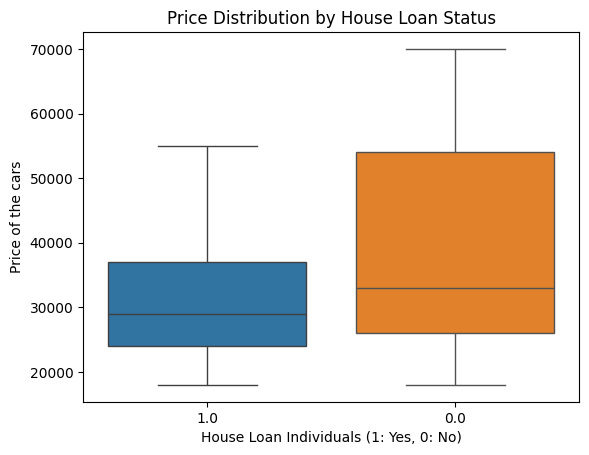

In [199]:
# Creating a boxplot for price distribution by loan status
sns.boxplot(x= Hou_fil_data1['House_loan'], y= fil_data1['Price'])
sns.boxplot(x= Hou_fil_data2['House_loan'], y= fil_data2['Price'])
plt.title('Price Distribution by House Loan Status')
plt.xlabel('House Loan Individuals (1: Yes, 0: No)')
plt.ylabel('Price of the cars')
plt.show()

* The median purchase price of individuals tends to be higher than that of individuals with house loans.*

* *The individuals who do not have a home loan tend to spend a higher amount on purchasing automobiles.*

* *The data suggests that individuals home loan status impacts the purchase price of automobiles*

## Relationship between Age and Purchase price of the Product

<ipython-input-200-5c8066a10955>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Age', y='Price',hue='Gender', style= 'Gender', ci=False);


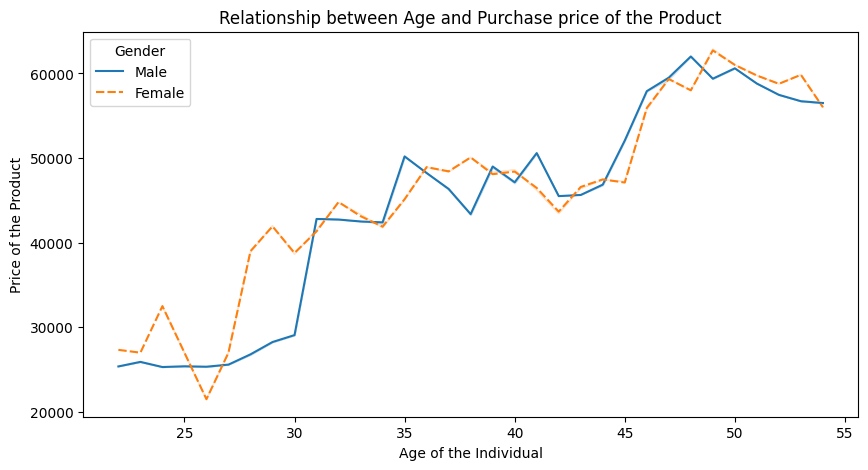

In [200]:
plt.figure(figsize=(10,5))
plt.title('Relationship between Age and Purchase price of the Product')
sns.lineplot(data=df, x='Age', y='Price',hue='Gender', style= 'Gender', ci=False);
plt.ylabel('Price of the Product')
plt.xlabel('Age of the Individual')
plt.show()

* *We can see that an individual's age is strongly linked to the purchase of high-priced cars.*
* *Young individuals tend to purchase lower-priced cars, while older individuals are likely to buy higher-priced cars.*

## Price Distribution for different Car Models

Text(0.5, 1.0, 'Price Distribution for different Car Models')

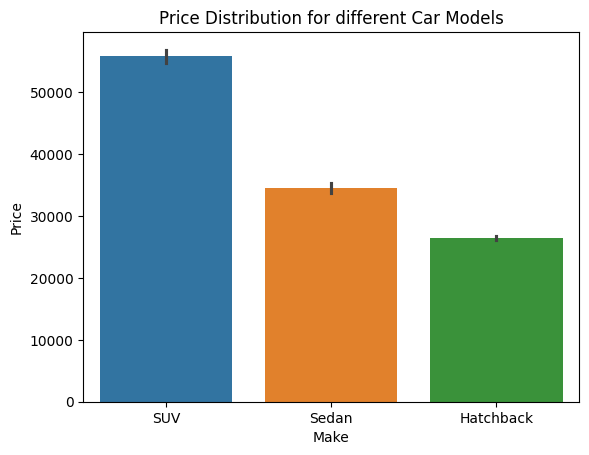

In [176]:
sns.barplot(data=df, x='Make', y='Price', hue= 'Make');
plt.title('Price Distribution for different Car Models')

The above plot shows that SUV and Sedan have high price structure than Hatchback model cars.

# **Outliers Treatment**

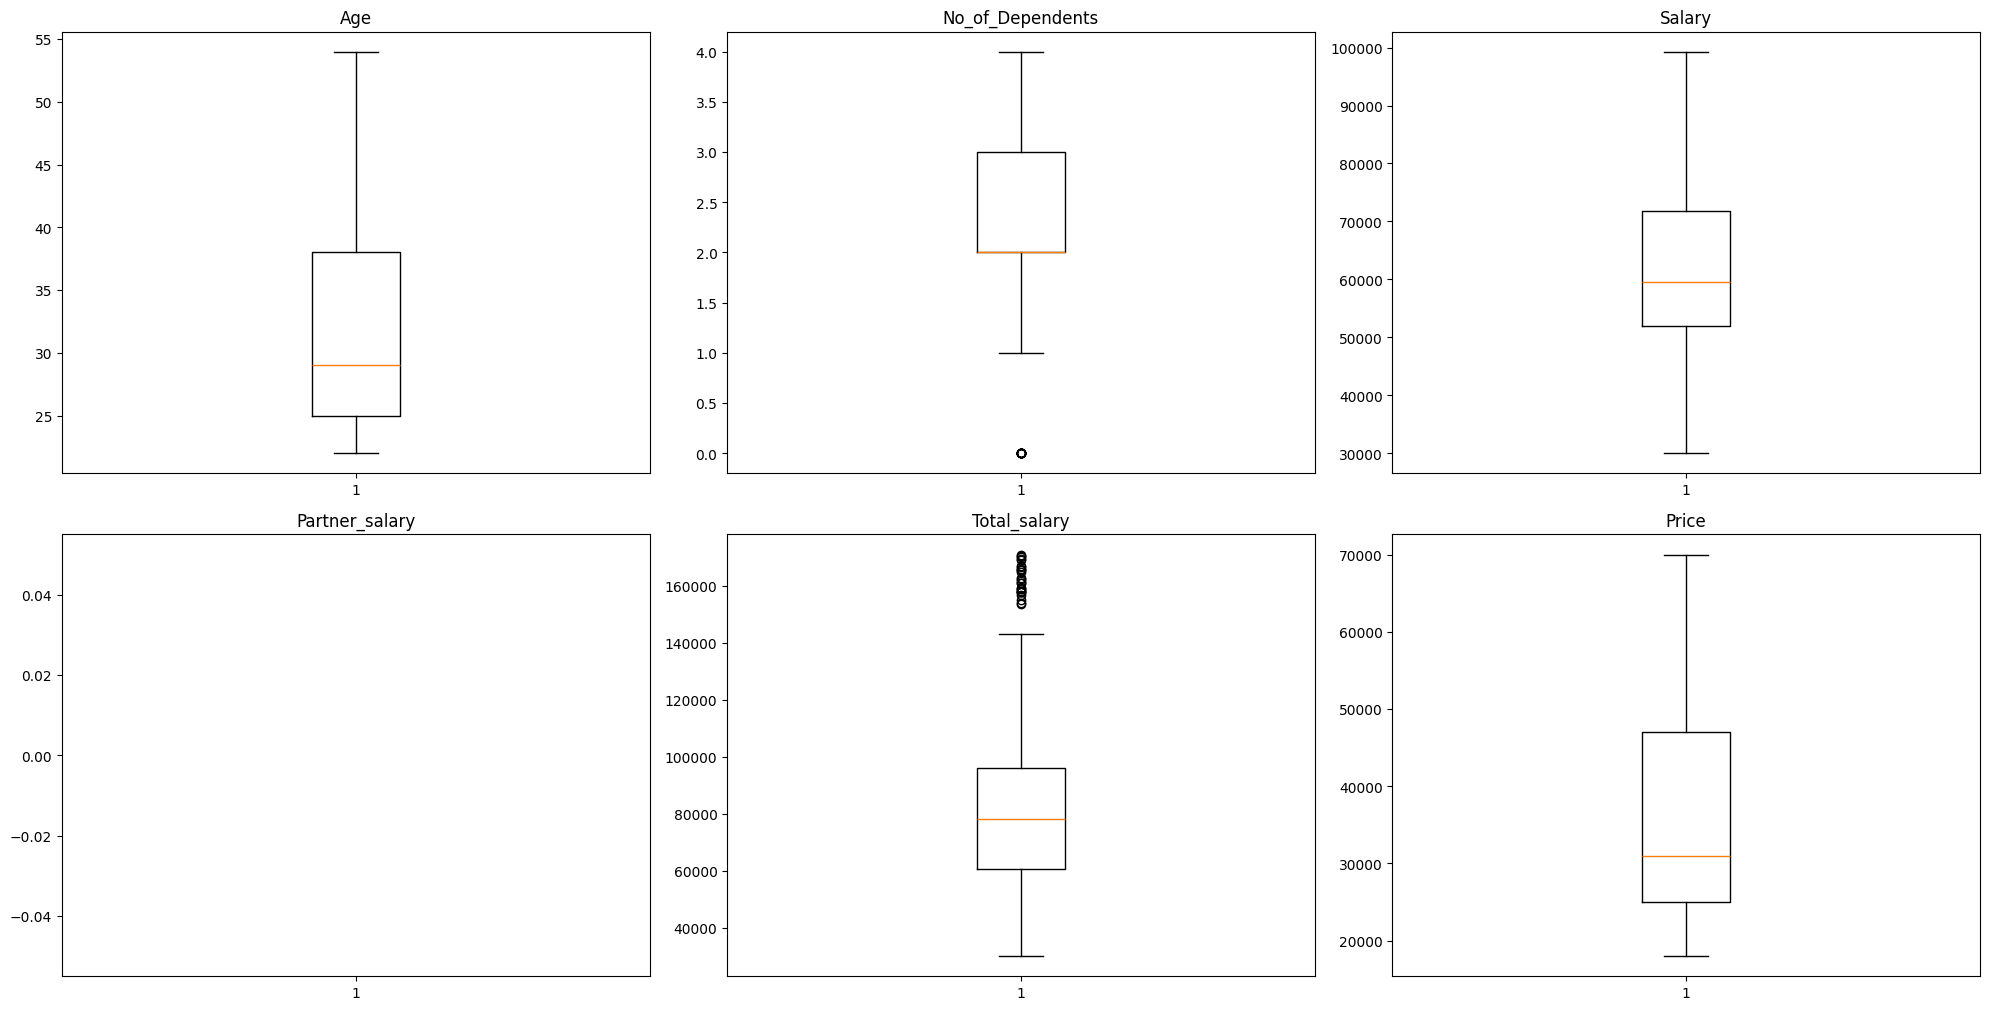

In [160]:
#Filtering all the numerical columns and storing them in a variable num_columns.
num_columns = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
plt.figure(figsize=(20, 15))

#outlier detection using boxplot
for i, variable in enumerate(num_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* *We can observe outliers only in the No_of_Dependents and Total_salary columns; the other columns do not have any outliers.*

* *However, we are not going to treat both columns since the  No_of_Dependents and Total_salary columns exhibit a wide range of values. We might miss out on genuine data if we treat the outliers.*

# **Insights and Recommendations**

## Insights

We have analyzed a dataset of 1,581 Austo Automobiles company customers information to understand their demands and purchase patterns, aiming to improve the efficiency of the current marketing campaign.This analysis is key to identifying the ideal customers for different model cars.

 From this analysis, we have been able to conclude that:


1. Age plays a crucial role in car purchase decisions. Younger age customers tend to purchase lower-priced cars, while older age customer are likely to buy higher-priced cars.

2. Females prefer SUV models more than males do.

3. Males have a strong preference for Sedans and Hatchbacks.

4. Sedans are the most popular choice for both Business and Salaried customers, but a salaried customer is most likely to purchase a sedan over other model cars.

5. Females tend to spend more money on purchasing automobiles compared to men, with a high median price.

6. The personal loan status of an individual does not impact the purchase price of the product, while the home loan status has a significant influence on the purchase price.

7. The working status of the Customer's partner doesn't have much influence on the decision to buy high-priced products.








## Recommendations to the Business

1. The company should tailor their marketing campaigns based on customer's demographics and their preferences.

2. Offer affordable and entry-level cars to younger customers, while showcase premium and high-end models to older customers.

4. Customize marketing messages and channels based on the age of the customers.

3. Highlight SUV models in marketing campaigns targeting females.

4. Emphasize sedan and hatchback models in marketing campaigns targeting male consumers.

5. Target sedans for business and salaried customers, prioritizing salaried customers.

6. Consider offering financial products for customers with or without home loans to encourage their purchase of these products.


* By implementing these recommendations, Austo Motor Company can better target their customers, improve the efficiency of their marketing campaigns, and increase sales.
